In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from fancyimpute import KNN

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.1f' % x)


### Playing around with using different columns that are complete

In [29]:
train = pd.read_csv('../data/clean_train_all_cols_chase.csv', parse_dates=['timestamp'], index_col="id")  
test = pd.read_csv('../data/clean_test_all_cols_chase.csv', parse_dates=['timestamp'], index_col="id")

In [30]:
# get the cols that in both
# tr_cols = train.columns.tolist()
# te_cols = test.columns.tolist()
# cols = list(set(tr_cols).intersection(te_cols))
# cols.append('price_doc')
cols = ['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
        'build_year','num_room', 'kitch_sq', 'state', 'product_type',
        'sub_area','okurg_district','price_full']
train = train[cols]


In [41]:
print train[train.product_type=='OwnerOccupier'].price_full.median()
print train[train.product_type=='Investment'].price_full.median()

100381.553417
156097.560976


In [4]:
test[~test.state.isnull()].groupby('state').product_type.value_counts()

state  product_type 
1.0    OwnerOccupier    1999
       Investment        267
2.0    Investment       2651
       OwnerOccupier      11
3.0    Investment       1885
       OwnerOccupier      28
4.0    Investment        115
       OwnerOccupier      12
Name: product_type, dtype: int64

In [5]:
test[~test.state.isnull()][['build_year','state']].groupby('state').describe()

build_year                                                
           count   mean   std    min    25%    50%    75%    max
state                                                           
1.0       1708.0 1427.3 915.5    0.0    1.0 2015.0 2016.0 2019.0
2.0       2654.0 1972.8 103.0    0.0 1966.0 1974.0 1989.0 2017.0
3.0       1907.0 1983.7  67.1    0.0 1970.0 1984.0 2003.0 2018.0
4.0        127.0 1994.1  21.5 1905.0 1985.5 2001.0 2008.0 2017.0

In [6]:
print test[test.state.isnull()].shape

(694, 294)


In [12]:
one_state = test[(test.state == 1)|(test.state.isnull())].copy()
one_state.loc[one_state.build_year > 2014,'state'] = 3
one_state.loc[one_state.build_year > 2016,'state'] = 4

In [13]:
test.loc[one_state.index,'state'] = one_state.state

In [42]:
bad_state = test[test.state.isnull()].copy()
bad_owners = bad_state[bad_state.product_type == 'OwnerOccupier'].copy()
bad_owners.loc[:,'state'] = 1
bad_owners.loc[bad_owners.build_year>1972,'state'] = 2
bad_owners.loc[bad_owners.build_year>1983,'state'] = 3
bad_owners.loc[bad_owners.build_year>1994,'state'] = 4
sum(bad_owners.build_year.isnull())

476

In [47]:
test.loc[bad.index,'state'] = bad.state

In [49]:
test.to_csv('../data/clean_test_all_cols_chase.csv')

In [46]:
bad = test[test.state.isnull()]
bad.loc[:,'state'] = 1
bad.loc[bad.build_year>1972,'state'] = 2
bad.loc[bad.build_year>1983,'state'] = 3
bad.loc[bad.build_year>1994,'state'] = 4

In [139]:
test.loc[bad_index,:].sort_values('build_year',ascending=False)
# bad_state[(bad_state.build_year < 1973)]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

In [146]:
test[test.product_type=='OwnerOccupier'].build_year.value_counts()

2017.0    413
2016.0    399
0.0       367
2015.0    205
1.0       179
2018.0     30
2019.0      5
1969.0      1
215.0       1
2011.0      1
2014.0      1
1972.0      1
2.0         1
Name: build_year, dtype: int64

In [124]:
bad_state = test[test.state.isnull()]
bad_state[bad_state.build_year < 1973] = 1

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

In [14]:
test[test.state.isnull()].groupby('okurg_district').count()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

In [ ]:
test.state

In [5]:
train_index = train.index.tolist()
test_index = test.index.tolist()

# cols = ['life_sq','full_sq','floor','max_floor','kitch_sq','product_type',
#         'sub_area','kremlin_km','price_doc','timestamp']

test['price_doc'] = np.nan

df = pd.concat([train[cols].copy(),
                test[cols].copy()],
               ignore_index=False)



locales = pd.read_csv('../data/okurg_chase.csv')
indices = pd.read_csv('../data/district_indices.csv')
macro = pd.read_csv('../data/macro_chase.csv', parse_dates=[0])


macro['quarter'] = pd.PeriodIndex(macro['Unnamed: 0'], freq='Q').strftime('Q%q-%y')
df['month'] = df.timestamp.dt.month.astype(object)
df['quarter'] = pd.PeriodIndex(df['timestamp'], freq='Q').strftime('Q%q-%y')

df = pd.merge(df,locales[['sub_area','okurg_district']],
              how="left", on="sub_area").reset_index(drop=True).set_index(df.index)

df = pd.merge(df,macro[['quarter','nominal_index']],
              how="left", on="quarter").reset_index(drop=True).set_index(df.index)



# indices['month_year'] = pd.PeriodIndex(indices['date'], freq='M').strftime('%m/%y')
# df['month_year'] = pd.PeriodIndex(df['timestamp'], freq='M').strftime('%m/%y')
# indices.columns = ['id', 'okurg_district', 'month_year', 'price', 'date', 'nominal_index']

In [324]:
df.sub_area = df.sub_area.apply(lambda x: x.replace(" ", "_"))
df.sub_area = df.sub_area.apply(lambda x: x.replace("'", ""))
df.sub_area = df.sub_area.apply(lambda x: x.replace("-", ""))

In [325]:
df['kitch_to_life'] = df.kitch_sq / df.life_sq
df['life_to_full'] = df.life_sq / df.full_sq
# df['bld_type'] = 'med_rise'
# df.loc[df.max_floor <= 5,'bld_type'] = 'low_rise'
# df.loc[df.max_floor >= 17,'bld_type'] = 'high_rise'
df['walk_up_penalty'] = 0
df.loc[(df.floor>4) & (df.max_floor < 6),'walk_up_penalty'] = 1 

In [326]:
df['price_doc'] = df.price_doc / df.nominal_index
df['price_full'] = df.price_doc / df.full_sq
df['log_price'] = np.log(df.price_doc)
# df['price_doc'] = df.price_doc / 1000


### Multiple Linear Regression

In [327]:
# print df.shape
# recent_df = df[(df.timestamp>'2013-01-01')].copy()
# print recent_df.shape
# train_index = recent_df[~recent_df.price_doc.isnull()].index.tolist()

In [358]:
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

ols = linear_model.LinearRegression()
pipe  =  make_pipeline(MinMaxScaler(), ols)
# param_grid = {'ridge__alpha': [100,10,1,0.1,0.01,0.001,0.0001,0]}
# grid =  GridSearchCV(pipe, cv=5)
# lm_predictions = grid.fit(x_train, y_train)
# ols = linear_model.LinearRegression()

# cols to drop
# drop_cols = ['timestamp','price_doc','nominal_index','adj_price_doc','price_full','log_price','price_full']
cols = ['full_sq','floor','sub_area','kremlin_km','month','product_type']

lm_data = df[cols]
df_obj = lm_data.select_dtypes(include=['object'])
df_num = lm_data.select_dtypes(exclude=['object'])


dummies = pd.get_dummies(df_obj)
df_all = pd.concat([df_num,dummies],axis=1)

x_train = df_all.loc[train_index,:]

y_train = df.loc[train_index,'log_price']

cross_val_score(ols, x_train, y_train, cv=5)
# print('R^2: %.2f' % pipe.score(x_train, y_train))


array([ 0.50260635,  0.56949638,  0.54622143,  0.57787994,  0.58164756])

## Trying forward selection

In [188]:
from itertools import combinations

In [281]:
combos = []
for i in range(1,len(clean_df.columns.tolist())):
    combos.append(combinations(clean_df.columns.tolist(),i))

In [301]:
# get the cols that in both
# tr_cols = train.columns.tolist()
# te_cols = test.columns.tolist()
# cols = set(tr_cols).intersection(te_cols)

scores = []
df.replace([np.inf, -np.inf], np.nan,inplace=True)
clean_df = df.drop('timestamp',axis=1)
clean_df.dropna(axis=1, inplace=True)

combos = []
for i in range(2,len(clean_df.columns.tolist())):
    combos.append(combinations(clean_df.columns.tolist(),i))
    
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
pipe = make_pipeline(MinMaxScaler(),linear_model.LinearRegression())

# for c in combos:
#     for p in c:
#         lm_data = clean_df.loc[:,p]
#         df_obj = lm_data.select_dtypes(include=['object'])
#         df_num = lm_data.select_dtypes(exclude=['object'])
        
        
#         try:
#             dummies = pd.get_dummies(df_obj)
#         except:
#             pass
            
#         if len(df_obj) > 0 and len(df_num) > 0:
#             df_all = pd.concat([df_num,dummies],axis=1)

#         elif len(df_obj) < 1:
#             df_all = df_num
            
#         else:
#             df_all = df_obj
        
#         x_train = df_all.loc[train_index,:]
#         y_train = df.loc[train_index,'log_price']
#         pipe.fit(x_train,y_train)
#         scores.append(pipe.score(x_train,y_train))
    

In [ ]:
print max(scores)

In [205]:
x = ('a','b','c')

['a', 'b', 'c']

In [164]:
df.loc[test_index,'price_doc'] = np.exp(ols.predict(x_test)) * df.loc[test_index,'nominal_index']
df['price_full'] = df.price_doc / df.full_sq

In [165]:
cols = ['price_doc','full_sq','price_full']
sub = df.loc[test_index,cols]

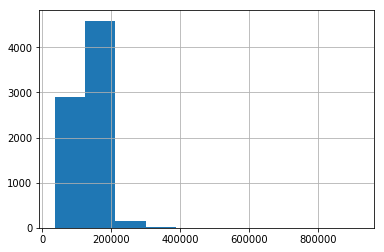

In [83]:
# kaggle score 0.33866
# sub['price_doc'].to_frame().to_csv('../Chase/submissions/simple_linear_052616.csv')

## Looking at stats

In [304]:
cols = ['price_full','product_type','full_sq','floor','kremlin_km','sub_area','month']
lm_data = df.loc[train_index,cols].copy()

df_obj = lm_data.select_dtypes(include=['object'])
df_num = lm_data.select_dtypes(exclude=['object'])

dummies = pd.get_dummies(df_obj)
df_all = pd.concat([df_num,dummies],axis=1)

In [305]:
all_columns = "+".join(df_all.columns[1:-1])

In [306]:
model = sm.ols(formula ='price_full ~ ' + all_columns, data = df_all)
fitted = model.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:             price_full   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 29 May 2017   Prob (F-statistic):               0.00
Time:                        15:43:53   Log-Likelihood:            -3.4269e+05
No. Observations:               29096   AIC:                         6.857e+05
Df Residuals:                   28947   BIC:                         6.869e+05
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

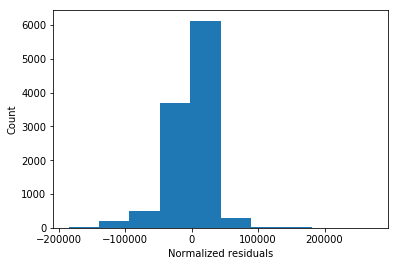

In [87]:
plt.hist(fitted.resid)
plt.ylabel('Count')
plt.xlabel('Normalized residuals')

In [307]:
influence = fitted.get_influence()
#c is the distance and p is p-value
x = pd.DataFrame({'c' :influence.cooks_distance[0], 'p': influence.cooks_distance[1]})
x.sort_values('c')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/stats/outliers_influence.py:309: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,c,p
20221,1.236036e-15,1.0
5589,1.225272e-14,1.0
13536,2.282613e-13,1.0
7994,2.571682e-13,1.0
12519,5.616858e-13,1.0
23956,6.565785e-13,1.0
9063,6.566309e-13,1.0
27791,9.269465e-13,1.0
15215,9.387580e-13,1.0
10915,1.191312e-12,1.0


In [ ]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(fitted)
influence_plot(fitted)

In [20]:
cols = ['price_doc','full_sq','sub_area','kremlin_km','price_full']
df.loc[27096,cols]

price_doc               8439.36
full_sq                      55
sub_area      Nagatinskij_Zaton
kremlin_km              8.05738
price_full              153.443
Name: 27096, dtype: object

456.50076120743444

In [119]:
cv_scores = cross_val_score(ols, x_train, y_train, cv=10)
print cv_scores

[ 0.55611992  0.57563789  0.64236933  0.60385353  0.59513042  0.59961819
  0.57438759  0.53179857  0.6425252   0.65684506]


In [120]:
ols.predict(x_test)

array([ 15.243526  ,  15.81082405,  15.33321917, ...,  15.11978371,
        15.37032004,  15.75736919])

In [121]:
cv_scores = cross_val_score(ols, x_train, y_train, cv=10)
print cv_scores

[ 0.55611992  0.57563789  0.64236933  0.60385353  0.59513042  0.59961819
  0.57438759  0.53179857  0.6425252   0.65684506]


In [122]:
test1 = pd.DataFrame({'price_doc': ols.predict(x_test)},index=test_index)

In [123]:
test['price_doc'] = ols.predict(x_test)

In [124]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


pipe  =  make_pipeline(MinMaxScaler(), Ridge())
param_grid = {'ridge__alpha': [100,10,1,0.1,0.01,0.001,0.0001,0]}
grid =  GridSearchCV(pipe, param_grid, cv=5)
lm_predictions = grid.fit(x_train, y_train)

In [125]:
# print lm_predictions.predict(x_train)
print lm_predictions.best_score_

0.597609856336


In [ ]:
from sklearn import preprocessing 

In [ ]:
np.exp(log_y_test)

In [58]:
cols = ['timestamp','price_doc','nominal_index','adj_price_doc','price_full','log_price','price_full']

pipe  =  make_pipeline(MinMaxScaler(), Ridge())
param_grid = {'ridge__alpha': [100,10,1,0.1,0.01,0.001,0.0001,0]}
grid =  GridSearchCV(pipe, param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'ridge__alpha': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
sub = grid.predict(x_test)

In [60]:
sub = pd.DataFrame({'id': test_index, 'price_doc':sub})

In [61]:
sub.loc[:,'nominal_index'] = df.loc[test_index,'nominal_index'].values

In [66]:
'%f' % 1.128899e+08

'112889900.000000'

In [62]:
sub.price_doc = sub.price_doc * sub.nominal_index

In [63]:
sub.loc[:,'price_doc'].to_frame().to_csv('../Chase/submissions/052617_linear_ridge_regression.csv')

In [64]:
sub.sort_values('price_doc')

,id,price_doc,nominal_index
6938,37412,16.722780,1.162486
7654,38128,16.795930,1.162486
5143,35617,16.865221,1.173957
6092,36566,16.874353,1.173957
5422,35896,16.875906,1.173957
4552,35026,16.875906,1.173957
5166,35640,16.875906,1.173957
4112,34586,16.877455,1.173957
5638,36112,16.879989,1.173957
4617,35091,16.887796,1.173957


In [237]:
# df.loc[test_index,'nominal_index']

In [247]:
sub.head()

,id,price_doc,nominal_index
0,30474,4.176246e+06,1.214295
1,30475,9.594552e+06,1.214295
2,30476,5.235794e+06,1.214295
3,30477,9.846788e+06,1.214295
4,30478,2.628036e+06,1.214295
